In [ ]:
# !pip show tensorflow numpy keras
# !pip install pillow
!pip install ..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF
import tensorflow as tf
from PIL import Image
from tensorflow import keras

from keras import Input, Model
from keras.models import load_model, Sequential
from keras.layers import Dense, Flatten, ReLU

import torch
import torch.nn as nn
import torch.optim as optim

from time import time
from scipy.stats import poisson, gamma, norm
from scipy.optimize import minimize_scalar
import multiprocessing as mp
from concurrent.futures import ThreadPoolExecutor

# from sddr import Sddr  # Assuming you have pyssdr installed and configured correctly
import logging
from datetime import datetime
from itertools import product

# import torch
logging.basicConfig(level=logging.INFO)
import os
import sys
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# import the sddr module
from sddr import Sddr

2025-02-25 15:10:19.617663: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-25 15:10:19.895311: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/scc/pa6512/miniconda3/lib/python3.12/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


INFO:root:Starting serial training...
INFO:root:Reading dataset: Number of obs 100 | Replication 0


Number of cores: 152
Using device: cpu
./outputs_debug/ssdr_n_100_rep_0_dist_gaussian_homo_SNR_1_point_estimates.pth
24
24
Beginning training ...
Train Epoch: 0 	 Training Loss: 30284.172266
Train Epoch: 0 	 Validation Loss: 22362.482422
Train Epoch: 10 	 Training Loss: 27302.365234
Train Epoch: 10 	 Validation Loss: 20261.089844
Train Epoch: 20 	 Training Loss: 24658.950781
Train Epoch: 20 	 Validation Loss: 18455.099609
Train Epoch: 30 	 Training Loss: 22293.001953
Train Epoch: 30 	 Validation Loss: 16904.659180
Train Epoch: 40 	 Training Loss: 20172.141406
Train Epoch: 40 	 Validation Loss: 15564.877441
Train Epoch: 50 	 Training Loss: 18263.699219
Train Epoch: 50 	 Validation Loss: 14398.037109
Train Epoch: 60 	 Training Loss: 16544.763281
Train Epoch: 60 	 Validation Loss: 13378.256836
Train Epoch: 70 	 Training Loss: 14997.506055
Train Epoch: 70 	 Validation Loss: 12484.489258
Train Epoch: 80 	 Training Loss: 13605.891992
Train Epoch: 80 	 Validation Loss: 11700.726074
Train Epoc

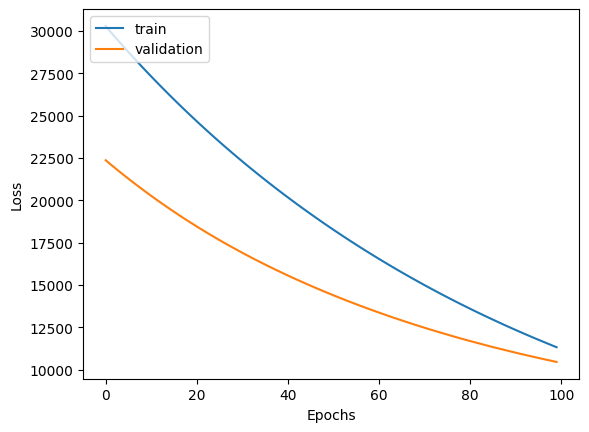

/scratch/ipykernel_4786/3672614598.py:30: UserWarning: Please note that the metadata for the structured input has not been saved. If you want to load the model and use
        it on new data you will need to also give the structured data used for training as input to the load function.
  var.save(f"{var_name}_{scenario_index}.pth")
INFO:root:Saved ssdr to ./outputs_debug/ssdr_n_100_rep_0_dist_gaussian_homo_SNR_1_point_estimates.npy
INFO:root:Saved point_estimates to ./outputs_debug/point_estimates_n_100_rep_0_dist_gaussian_homo_SNR_1_point_estimates.npy
INFO:root:Reading dataset: Number of obs 100 | Replication 1


Using device: cpu
./outputs_debug/ssdr_n_100_rep_1_dist_gaussian_homo_SNR_1_point_estimates.pth
24
24
Beginning training ...
Train Epoch: 0 	 Training Loss: 7499.954492
Train Epoch: 0 	 Validation Loss: 6723.322754
Train Epoch: 10 	 Training Loss: 6681.013574
Train Epoch: 10 	 Validation Loss: 6044.765381
Train Epoch: 20 	 Training Loss: 6058.189600
Train Epoch: 20 	 Validation Loss: 5544.120850
Train Epoch: 30 	 Training Loss: 5539.993994
Train Epoch: 30 	 Validation Loss: 5123.573486
Train Epoch: 40 	 Training Loss: 5077.780029
Train Epoch: 40 	 Validation Loss: 4746.535156
Train Epoch: 50 	 Training Loss: 4660.106787
Train Epoch: 50 	 Validation Loss: 4409.272217
Train Epoch: 60 	 Training Loss: 4281.998633
Train Epoch: 60 	 Validation Loss: 4107.990356
Train Epoch: 70 	 Training Loss: 3939.129639
Train Epoch: 70 	 Validation Loss: 3837.911377
Train Epoch: 80 	 Training Loss: 3626.991870
Train Epoch: 80 	 Validation Loss: 3595.945435


/home/scc/pa6512/miniconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/home/scc/pa6512/miniconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
/home/scc/pa6512/miniconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/home/scc/pa6512/miniconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
/home/scc/pa6512/miniconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instea

KeyboardInterrupt: 

In [3]:

def scale_to_range(data, lower=-1, upper=1):
    return (data - np.min(data)) / (np.max(data) - np.min(data)) * (upper - lower) + lower

# def build_dnn(input_dim, layer_sizes=[32, 16], activation="relu"):
#     model = Sequential([
#         Input(shape=(input_dim,)),
#         Dense(layer_sizes[0], activation=activation),
#         Dense(layer_sizes[1], activation=activation),
#         Dense(1, activation=None)
#     ])
#     model.compile(optimizer='adam', loss='mse')  # Compile the model

#     return model

def save_with_var_name(var, var_name, var_type, save_path, scenario_index):
    if var_type == 'npy':
        np.save(f"{save_path}/{var_name}_{scenario_index}.npy", var)
    if var_type == 'keras':
        var.save(f"{save_path}/{var_name}_{scenario_index}.keras")
    if var_type == 'jpgs':
        images_path = f"{save_path}/{var_name}_{scenario_index}"
        os.makedirs(images_path, exist_ok=True)
        for idx, img in enumerate(var):
            # Normalize and convert to uint8
            normalized_img = (img * 255 / np.max(img)).astype(np.uint8)
            # Convert the NumPy array to an image
            normalized_img = Image.fromarray(normalized_img).convert("L")
            normalized_img.save(f"{images_path}/{var_name}_{scenario_index}_{idx}.jpg")
    if var_type == 'pth':
        var.save(f"{var_name}_{scenario_index}.pth")
    if var_type == 'df':
        var.to_csv(f"{save_path}/{var_name}_{scenario_index}.csv", index=False)

    logging.info(f"Saved {var_name} to {save_path}/{var_name}_{scenario_index}.npy")
    
def read_with_var_name(var_name, var_type, save_path, scenario_index):
    if var_type == 'npy':
        return np.load(f"{save_path}/{var_name}_{scenario_index}.npy")
    if var_type == 'keras':
        return tf.keras.models.load_model(f"{save_path}/{var_name}_{scenario_index}.keras")

def plot_true_and_ci(true_effect, partial_effect, param, spline_index):
    """
    Plots the estimated partial effect with its 95% CI and overlays the true nonlinear effect.
    
    Parameters:
      - true_effect: 1D array of shape (n_samples,) for the true effect for this spline.
      - partial_effect: tuple (feature, pred, ci950, ci951, ci250, ci251) from ssdr.eval.
      - param: parameter name (e.g., 'loc' or 'scale' or 'rate').
      - spline_index: index of the current spline.
    """
    feature, pred, ci950, ci951, _, _ = partial_effect

    # Sort by feature for better plotting.
    sort_idx = np.argsort(feature)
    feature_sorted = np.array(feature)[sort_idx]
    pred_sorted = np.array(pred)[sort_idx]
    ci950_sorted = np.array(ci950)[sort_idx]
    ci951_sorted = np.array(ci951)[sort_idx]
    true_effect_sorted = np.array(true_effect)[sort_idx]

    plt.figure(figsize=(8, 6))
    plt.plot(feature_sorted, pred_sorted, label="Estimated Partial Effect", color="blue")
    plt.fill_between(feature_sorted, ci950_sorted, ci951_sorted, color="blue", alpha=0.3, label="95% CI")
    plt.scatter(feature_sorted, true_effect_sorted, color="red", marker="x", label="True Nonlinear Effect")
    plt.title(f"Parameter: {param} - Spline {spline_index}")
    plt.xlabel("Feature")
    plt.ylabel("Effect")
    plt.legend()
    plt.show()
    
# ---------------------------
# Train Task Function for Parallel Execution
# ---------------------------
def predict_effects(scenario_index_folder, read_path, save_path, case, data, train_parameters,
                    num_knots, grid_size, output_dimension_dnn, true_nonlinear_effects):
    distribution, snr, method = case
    # os.makedirs(save_path, exist_ok=True)
    scenario_index = scenario_index_folder + f"_dist_{distribution}_SNR_{snr}"

    # a = read_with_var_name('a', 'npy', save_path, scenario_index)
    # etas = read_with_var_name('etas', 'npy', save_path, scenario_index)
    y = read_with_var_name('y', 'npy', read_path, scenario_index)
    data['Y'] = y
    # print(scenario_index)
    # print(data)
    # Train base SSDR model
    deep_models_dict = {
        'dnn': {
            'model': nn.Sequential(
                nn.Flatten(1, -1),
                nn.Linear(grid_size*grid_size,output_dimension_dnn),
                nn.ReLU()
                ),
            'output_shape': output_dimension_dnn},
    }

    # provide the location and datatype of the unstructured data
    unstructured_data = {
    'Image' : {
        'path' : f"{read_path}/images_jpg_{scenario_index_folder}/",
        'datatype' : 'image'
    }
    }
    
    if distribution == "poisson":
        distribution_SSDR = "Poisson" # compatible form
        formulas = {'rate': f"~ 1 + X1 + X2 + spline(Z1, bs='bs', df={num_knots+4}) + spline(Z2, bs='bs', df={num_knots+4}) + dnn(Image)"}
        degrees_of_freedom = {'rate':num_knots+4}
    elif distribution == "gamma":
        distribution_SSDR = "Gamma" # compatible form
        formulas = {
        'loc': f"~ 1 + X1 + X2 + spline(Z1, bs='bs', df={num_knots+4}) + spline(Z2, bs='bs', df={num_knots+4}) + dnn(Image)",
        'scale': '~ 1'
        }
        degrees_of_freedom = {'loc':num_knots+4, 'scale':num_knots+4}
    elif distribution == "gaussian_homo":
        distribution_SSDR = "Normal" # compatible form
        formulas = {
        'loc': f"~ 1 + X1 + X2 + spline(Z1, bs='bs', df={num_knots+4}) + spline(Z2, bs='bs', df={num_knots+4}) + dnn(Image)",
        'scale': '~ 1'
        }
        degrees_of_freedom = {'loc':num_knots+4, 'scale':num_knots+4}
    elif distribution == "gaussian_hetero":
        distribution_SSDR = "Normal" # compatible form
        formulas = {
        'loc': f"~ 1 + X1 + X2 + spline(Z1, bs='bs', df={num_knots+4}) + spline(Z2, bs='bs', df={num_knots+4}) + dnn(Image)",
        'scale': f"~ 1 + X1 + X2 + spline(Z1, bs='bs', df={num_knots+4}) + spline(Z2, bs='bs', df={num_knots+4}) + dnn(Image)",
        }
        degrees_of_freedom = {'loc':num_knots+4, 'scale':num_knots+4}

    train_parameters['degrees_of_freedom'] = degrees_of_freedom
    
    
    # model.fit([X_struct, X_unstruct], y, epochs=50, batch_size=32, verbose=1)
    if method == "point_estimates":
        # define your training hyperparameters
        ssdr = Sddr(output_dir=save_path,
            distribution=distribution_SSDR,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters,
            modify=True
            )
        # print(train_parameters['epochs'])
        scenario_index += f"_{method}"
        model_path = f"{save_path}/ssdr_{scenario_index}.pth"
        print(model_path)
        if os.path.exists(model_path):
            # Here, final_epochs is your intended final epoch count (e.g., 300) 
            ssdr.load(model_path, data)
            ssdr.train(target="Y", structured_data=data, resume=True)
        else:  
            ssdr.train(structured_data=data,
                target="Y",
                unstructured_data = unstructured_data,
                plot=True)
            save_with_var_name(ssdr, 'ssdr', 'pth', save_path, scenario_index)
        
        
        # Create an empty list to store the result rows.
        results = []

        # Loop over each parameter group in degrees_of_freedom.
        for k in degrees_of_freedom.keys():
            # Get the coefficient dictionary for parameter group k.
            # This dictionary is expected to have keys corresponding to feature names.
            
            # Combine the features (if you want to process both kinds together)
            coeff_dict = ssdr.coeff(k)
            
            for feature in coeff_dict.keys():
                # Extract the point estimate for the feature.
                # (Assuming ssdr.coeff(k)[feature] returns a list/array where the first element is the estimate.)                
                # Append a dictionary with the desired columns.
                results.append({
                    'scenario_index': scenario_index,  # scenario_index should be defined in your code
                    'param_y': k,
                    'param_eta': feature,
                    'value': coeff_dict[feature]
                })

        # Convert the list of dictionaries to a DataFrame.
        df_results = pd.DataFrame(results)
        save_with_var_name(df_results, 'point_estimates', 'df', save_path, scenario_index)
        return df_results
    # if method == "point_estimates":
    #     # define your training hyperparameters and train the model
    #     ssdr = Sddr(output_dir=save_path,
    #                 distribution=distribution_SSDR,
    #                 formulas=formulas,
    #                 deep_models_dict=deep_models_dict,
    #                 train_parameters=train_parameters,
    #                 modify=True)
    #     scenario_index += f"_{method}"
    #     model_path = f"{save_path}/ssdr_{scenario_index}.pth"
    #     print(model_path)
    #     if os.path.exists(model_path):
    #         # load and resume training
    #         ssdr.load(model_path, data)
    #         ssdr.train(target="Y", structured_data=data, resume=True)
    #     else:
    #         ssdr.train(structured_data=data,
    #                 target="Y",
    #                 unstructured_data=unstructured_data,
    #                 plot=True)
    #         save_with_var_name(ssdr, 'ssdr', 'pth', save_path, scenario_index)
        
    #     # Create an empty list to store result rows.
    #     results = []
        
    #     # Loop over each parameter group in degrees_of_freedom.
    #     for k in degrees_of_freedom.keys():
    #         # Get the coefficient dictionary (point estimates) for the structured head.
    #         coeff_dict = ssdr.coeff(k)
            
    #         # Also get the corresponding structured weights and latent features from the deep branch.
    #         # (get_weights_and_latent_features returns a dict with keys 'structured_weights' and 'latent_features'.)
    #         extra_info = ssdr.get_weights_and_latent_features(k, data)
            
    #         # Loop over each term in the coefficient dictionary.
    #         for term in coeff_dict.keys():
    #             results.append({
    #                 'scenario_index': scenario_index,  # the current scenario index
    #                 'param_y': k,
    #                 'param_eta': term,
    #                 'value': coeff_dict[term],
    #                 'structured_weight': extra_info['structured_weights'][term],
    #                 # If latent_features is a tensor, convert to list for storage.
    #                 'latent_features': (extra_info['latent_features'].cpu().numpy().tolist() 
    #                                     if extra_info['latent_features'] is not None 
    #                                     else None)
    #             })
        
    #     # Convert the list of dictionaries to a DataFrame.
    #     df_results = pd.DataFrame(results)
    #     save_with_var_name(df_results, 'point_estimates', 'df', save_path, scenario_index)
    #     return df_results

    # Deep ensemble
    elif method == "deep_ensemble":
        # Train ensemble of models
        n_ensemble = 5
        # ensemble_models = []
        # for i in range(n_ensemble):
        #     # define your training hyperparameters
        #     train_parameters = {
        #         'batch_size': 3,
        #         'epochs': 100,
        #         'degrees_of_freedom': degrees_of_freedom,
        #         'optimizer' : optim.Adam,
        #         'val_split': 0.15,
        #         'early_stop_epsilon': 0.001,
        #     }
        #     ensemble_model = build_ssdr_model(X_struct.shape[1], X_unstruct.shape[1])
        #     ensemble_model.fit([X_struct, X_unstruct], y, epochs=50, verbose=0)
        #     ensemble_models.append(ensemble_model)
        
        # # Predict and compute ensemble uncertainty
        # ensemble_predictions = np.array([
        #     model.predict([X_struct_eval, X_unstruct_eval]) for model in ensemble_models
        # ])
        # mean_predictions = np.mean(ensemble_predictions, axis=0)
        # uncertainty = np.std(ensemble_predictions, axis=0)
    
    # Dropout sampling
    elif method == "dropout_sampling":
        # define your training hyperparameters
        ssdr = Sddr(output_dir=save_path,
            distribution=distribution_SSDR,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters,
            modify=True
            )
        # print(train_parameters['epochs'])
        scenario_index += f"_{method}"
        model_path = f"{save_path}/ssdr_{scenario_index}.pth"
        if os.path.exists(model_path):
            # Here, final_epochs is your intended final epoch count (e.g., 300) 
            ssdr.load(model_path, data)
            ssdr.train(target="Y", structured_data=data, resume=True)
        else:  
            ssdr.train(structured_data=data,
                target="Y",
                unstructured_data = unstructured_data,
                plot=True)
            
            save_with_var_name(ssdr, 'ssdr', 'pth', save_path, scenario_index)

        
        eval_dict = {}
        for k in degrees_of_freedom.keys():
            eval_results = ssdr.eval(k, plot=False)
            eval_dict[k] = eval_results
        
        param_to_index = {"rate": 0, "loc": 0, "scale": 1}
    
        # Compute coverage rates for each parameter.
        coverage_rates = {}
        for param, partial_effects in eval_dict.items():
            if len(partial_effects)>0:
                coverage_rates[param] = {}
                # For Gaussian (or gamma) cases, we assume true_nonlinear_effects is a dict with keys matching the parameter names.
                # For Poisson, true_nonlinear_effects is a list.
                true_effects = true_nonlinear_effects[:,:,param_to_index[param]]

                # for idx, effect in enumerate(partial_effects):
                #     if len(effect) == 6:
                #         _, _, ci950, ci951, _, _ = effect
                #         true_effect = true_effects[idx,:]
                #         covered = np.logical_and(true_effect >= ci950, true_effect <= ci951)
                #         coverage_rate = np.mean(covered)
                #         coverage_rates[param][f'spline_{idx}'] = coverage_rate
                #     else:
                #         coverage_rates[param][f'spline_{idx}'] = None
                for idx, effect in enumerate(partial_effects):
                    if len(effect) == 6:
                        feature, _, ci950, ci951, _, _ = effect
                        
                        # Get the corresponding true effect for this spline; shape: (n_samples, )
                        true_effect = true_effects[idx, :]
                        plot_true_and_ci(true_effect, effect, param, idx)
                        # Sort both the feature and true effect to ensure proper alignment.
                        sort_idx = np.argsort(feature)
                        sorted_feature = np.array(feature)[sort_idx]
                        sorted_ci950 = ci950[sort_idx]
                        sorted_ci951 = ci951[sort_idx]
                        sorted_true_effect = true_effect[sort_idx]
                        
                        # Now compute coverage.
                        covered = np.logical_and(sorted_true_effect >= sorted_ci950, sorted_true_effect <= sorted_ci951)
                        coverage_rate = np.mean(covered)
                        coverage_rates[param][f'spline_{idx}'] = coverage_rate
                    else:
                        coverage_rates[param][f'spline_{idx}'] = None

        
        print("Coverage rates for replicate:")
        for param, cov_dict in coverage_rates.items():
            print(f"Parameter {param}:")
            for key, val in cov_dict.items():
                if val is not None:
                    print(f"  {key}: {val:.2%}")
                else:
                    print(f"  {key}: N/A")
        
        return coverage_rates
    
    # # Last-layer inference
    # elif method == "last_layer":
    #     mean_predictions, uncertainty = last_layer_inference(
    #         model, X_struct_eval, X_unstruct_eval
    #     )
    
    else:
        raise ValueError("Unsupported method. Choose from 'deep_ensemble', 'dropout_sampling', or 'last_layer'.")
    
    
    
    
    
    # # Calculate confidence intervals and coverage rates
    # confidence_level = 0.95
    # z = norm.ppf(1 - (1 - confidence_level) / 2)
    # lower_bound = mean_predictions - z * uncertainty
    # upper_bound = mean_predictions + z * uncertainty
    # coverage_rate = np.mean((y_eval >= lower_bound) & (y_eval <= upper_bound))
    
    # return {
    #     "mean_predictions": mean_predictions,
    #     "uncertainty": uncertainty,
    #     "coverage_rate": coverage_rate,
    #     "lower_bound": lower_bound,
    #     "upper_bound": upper_bound
    # }

    # train_per_case(scenario, save_path, distribution, snr, X, images, y, epochs=50, batch_size=32, learning_rate=0.01, verbose=0)

    # return sddr
    
def training_task(n_sample, distribution_list, SNR_list, method_list, grid_size, train_parameters, 
                  num_knots, n_rep, read_path, save_path, compute_type='parallel'):
    
    # Set random seed for reproducibility
    np.random.seed(n_sample+n_rep)
    logging.info(f"Reading dataset: Number of obs {n_sample} | Replication {n_rep}")

    scenario_index = f"n_{n_sample}_rep_{n_rep}"
    X = read_with_var_name('X', 'npy', read_path, scenario_index)
    # linear_effects = read_with_var_name('linear_effects', 'npy', read_path, scenario_index)
    # print(X.shape)
    Z = read_with_var_name('Z', 'npy', read_path, scenario_index)
    nonlinear_effects = read_with_var_name('nonlinear_effects', 'npy', read_path, scenario_index)
    # print(Z.shape)
    # Step 1: Transpose X and Z
    X_transposed = X.T  # Shape (10, 2)
    Z_transposed = Z.T  # Shape (10, 2)

    # Step 2: Combine X and Z
    combined_data = np.hstack((X_transposed, Z_transposed))  # Shape (10, 4)
    df = pd.DataFrame(combined_data, columns=['X1', 'X2', 'Z1', 'Z2'])
    df['Image'] = [f'images_jpg_{scenario_index}_{i}.jpg' for i in range(len(df))]
    # print(df)
    # images = read_with_var_name('images', 'npy', save_path, scenario_index)
    
    # dnn_model = read_with_var_name('dnn_model', 'keras', save_path, scenario_index)
    # unstructured_effects = read_with_var_name('unstructured_effects', 'npy', save_path, scenario_index)
    U_k = read_with_var_name('U_k', 'npy', read_path, scenario_index)
    # psi_k = read_with_var_name('psi_k', 'npy', save_path, scenario_index)
    # b_k = read_with_var_name('b_k', 'npy', save_path, scenario_index)
    output_dimension_dnn = U_k.shape[1]
    combinations = list(product(distribution_list, SNR_list, method_list))
    
    # For each combination, call predict_effects.
    coverage_results = {}
    if compute_type == 'parallel':
        def process_combination(c):
            coverage_rates = predict_effects(scenario_index, read_path, save_path, c, df, train_parameters,
                                             num_knots, grid_size, output_dimension_dnn, nonlinear_effects)
            key = f"n_{n_sample}_rep_{n_rep}_dist_{c[0]}_SNR_{c[1]}_method_{c[2]}"
            return key, coverage_rates

        with ThreadPoolExecutor() as executor:
            results = executor.map(process_combination, combinations)
        
        for key, coverage_rates in results:
            coverage_results[key] = coverage_rates

        return n_sample, n_rep, coverage_results
    
    if compute_type == 'serial':
        for c in combinations:
            coverage_rates = predict_effects(scenario_index, read_path, save_path, c, df, train_parameters,
                                             num_knots, grid_size, output_dimension_dnn, nonlinear_effects)    
            # Store the coverage rates using a key that identifies the combination and replication.
            key = f"n_{n_sample}_rep_{n_rep}_dist_{c[0]}_SNR_{c[1]}_method_{c[2]}"
            coverage_results[key] = coverage_rates
        return n_sample, n_rep, coverage_results
# ---------------------------
# Parallel Execution Function
# ---------------------------

def uq_comparison(n_list, distribution_list, SNR_list, method_list, grid_size,
                  train_parameters_list, num_knots, n_rep, n_cores, save_path,
                  compute_type='parallel'):
    logging.info(f"Starting {compute_type} training...")
    start_time = datetime.now()
    replicates = [(i, r) for i in n_list for r in range(n_rep)]
    read_path = "../data_generation/output"
    os.makedirs(save_path, exist_ok=True)
    
    results = []
    if compute_type == 'parallel':
        with mp.Pool(n_cores) as pool:
            results = pool.starmap(
                training_task,
                [(i, distribution_list, SNR_list, method_list, grid_size, train_parameters_list[n_list.index(i)], 
                  num_knots, r, read_path, save_path, compute_type)
                 for (i, r) in replicates]
            )
    elif compute_type == 'serial':
        for (i, r) in replicates:
            results.append(training_task(n_sample=i, distribution_list=distribution_list, 
                                         SNR_list=SNR_list, method_list=method_list, grid_size=grid_size, 
                                         train_parameters=train_parameters_list[n_list.index(i)], 
                                         num_knots=num_knots, n_rep=r, 
                                         read_path=read_path, save_path=save_path, compute_type=compute_type))
    end_time = datetime.now()
    logging.info(f"Training completed in {end_time - start_time}.")
    return results

# ---------------------------
# Scenario Setup
# ---------------------------
if __name__ == '__main__':

    # n_list = [100, 500, 1000]
    n_list = [100]
    distribution_list = ["gaussian_homo"] # "gamma", "poisson", 
    SNR_list=[1] #,8]
    # method_list = ['deep_ensemble', 'dropout_sampling', 'last_layer']
    method_list = ['point_estimates']
    n_rep=5
    grid_size = 28
    n_core = mp.cpu_count()
    print(f"Number of cores: {n_core}")
    # define output directory
    # save_path = os.path.join(os.environ["TMPDIR"], "output")

    save_path = './outputs_debug'

    # For n=100:
    train_parameters_small = {
        'batch_size': 16,              # Smaller batch size due to limited sample size.
        'epochs': 100,
        # 'degrees_of_freedom': {'rate': 3},  # For Poisson; adjust accordingly for other distributions.
        'optimizer': optim.Adam,
        'val_split': 0.20,             # Possibly a higher split for very small samples.
        'early_stop_epsilon': 0.001,
        # 'dropout_rate': 0.01           # Start with 0.01; consider 0.01-0.05 range.
    }

    # For n=500 and n=1000:
    train_parameters_large = {
        'batch_size': 32,              # Larger batch size as more data is available.
        'epochs': 100,
        # 'degrees_of_freedom': {'rate': 3},  # Or {'loc': 3, 'scale': 3} for Gaussian cases.
        'optimizer': optim.Adam,
        'val_split': 0.15,
        'early_stop_epsilon': 0.001,
        # 'dropout_rate': 0.01           # Can experiment with 0.01 to 0.05.
    }

    num_knots = 20
    train_parameters_list = [train_parameters_small, train_parameters_large, train_parameters_large]


    results = uq_comparison(n_list, distribution_list, SNR_list, method_list, grid_size, train_parameters_list,
                            num_knots,
                            n_rep, n_cores=n_core, save_path=save_path, compute_type='serial') # parallel
    
    

In [ ]:
results

In [ ]:
# Aggregate the coverage results across replicates.
aggregated_coverage = {}
for n_sample, rep, cov_dict in results:
    for key, cov in cov_dict.items():
        if key not in aggregated_coverage:
            aggregated_coverage[key] = []
        aggregated_coverage[key].append(cov)

# Compute the average coverage rate for each scenario and parameter.
for key, cov_list in aggregated_coverage.items():
    avg_cov = {}
    for param in cov_list[0]:
        replicate_means = []
        for replicate_cov in cov_list:
            # replicate_cov[param] is a dictionary of spline coverage rates,
            # e.g. {'spline_0': 0.85, 'spline_1': 0.90}
            spline_rates = [r for r in replicate_cov.get(param, {}).values() if r is not None]
            if spline_rates:
                replicate_means.append(np.mean(spline_rates))
        avg_cov[param] = np.mean(replicate_means) if replicate_means else None
    print(f"Scenario {key}: Average Coverage Rates: {avg_cov}")

# Optionally, save the aggregated coverage results.
save_with_var_name(aggregated_coverage, "aggregated_coverage", "npy", save_path, "all_scenarios")

In [4]:
read_path = "../data_generation/output"
scenario_index = f"n_{100}_rep_{0}"
U_k = read_with_var_name('U_k', 'npy', read_path, scenario_index)
output_dimension_dnn = U_k.shape[1]


In [5]:
distribution_SSDR = "Normal" # compatible form
formulas = {
'loc': f"~ 1 + X1 + X2 + spline(Z1, bs='bs', df={num_knots+4}) + spline(Z2, bs='bs', df={num_knots+4}) + dnn(Image)",
'scale': '~ 1'
}
degrees_of_freedom = {'loc':24, 'scale':24}
deep_models_dict = {
        'dnn': {
            'model': nn.Sequential(
                nn.Flatten(1, -1),
                nn.Linear(grid_size*grid_size,output_dimension_dnn),
                nn.ReLU()
                ),
            'output_shape': output_dimension_dnn},
    }
train_parameters = {
        'batch_size': 16,              # Smaller batch size due to limited sample size.
        'epochs': 100,
        # 'degrees_of_freedom': {'rate': 3},  # For Poisson; adjust accordingly for other distributions.
        'optimizer': optim.Adam,
        'val_split': 0.20,             # Possibly a higher split for very small samples.
        'early_stop_epsilon': 0.001,
        # 'dropout_rate': 0.01           # Start with 0.01; consider 0.01-0.05 range.
    }

train_parameters['degrees_of_freedom'] = degrees_of_freedom
unstructured_data = {
    'Image' : {
        'path' : f"{read_path}/images_jpg_{scenario_index}/",
        'datatype' : 'image'
    }
    }
ssdr = Sddr(output_dir=save_path,
            distribution=distribution_SSDR,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters,
            modify=True
            )
X = read_with_var_name('X', 'npy', read_path, scenario_index)
# linear_effects = read_with_var_name('linear_effects', 'npy', read_path, scenario_index)
# print(X.shape)
Z = read_with_var_name('Z', 'npy', read_path, scenario_index)
nonlinear_effects = read_with_var_name('nonlinear_effects', 'npy', read_path, scenario_index)
# print(Z.shape)
# Step 1: Transpose X and Z
X_transposed = X.T  # Shape (10, 2)
Z_transposed = Z.T  # Shape (10, 2)

# Step 2: Combine X and Z
combined_data = np.hstack((X_transposed, Z_transposed))  # Shape (10, 4)
df = pd.DataFrame(combined_data, columns=['X1', 'X2', 'Z1', 'Z2'])
df['Image'] = [f'images_jpg_{scenario_index}_{i}.jpg' for i in range(len(df))]
# os.makedirs(save_path, exist_ok=True)
scenario_index = scenario_index + f"_dist_gaussian_homo_SNR_1"

# a = read_with_var_name('a', 'npy', save_path, scenario_index)
# etas = read_with_var_name('etas', 'npy', save_path, scenario_index)
y = read_with_var_name('y', 'npy', read_path, scenario_index)
df['Y'] = y
ssdr.load('./outputs_debug/ssdr_n_100_rep_0_dist_gaussian_homo_SNR_1_point_estimates.pth',
          df)
ssdr.train(target="Y", structured_data=df, resume=True)


Using device: cpu
24
24
Loaded model ./outputs_debug/ssdr_n_100_rep_0_dist_gaussian_homo_SNR_1_point_estimates.pth at epoch 100 with a validation loss of 10468.1421
Beginning training ...


In [6]:
net_loc = ssdr.net.single_parameter_sddr_list['loc']

In [7]:
ssdr.coeff("loc")

{'Intercept': array([0.06083461], dtype=float32),
 'X1': array([-0.27388215], dtype=float32),
 'X2': array([0.06389987], dtype=float32),
 "spline(Z1, bs='bs', df=24)": array([-0.02716911, -0.1502083 ,  0.08915941,  0.00341093, -0.10176762,
        -0.22853501, -0.1698506 , -0.07311463,  0.06400301, -0.01527868,
        -0.16755626, -0.165629  , -0.05728169,  0.11317274,  0.04690243,
         0.01842467,  0.3821651 ,  0.24816796, -0.14492553, -0.10131226,
         0.23916532,  0.10972033,  0.1978991 ,  0.21067359], dtype=float32),
 "spline(Z2, bs='bs', df=24)": array([ 0.242038  ,  0.36188853, -0.25710744, -0.23560256, -0.11818494,
        -0.04522917, -0.02499777, -0.1784563 , -0.42915365, -0.00850329,
        -0.25722575, -0.41706994, -0.12326404,  0.28168833,  0.08507476,
         0.04096813,  0.26483554,  0.0877103 ,  0.10024875, -0.10896218,
        -0.3801032 , -0.08763045,  0.09155629,  0.28837582], dtype=float32)}

In [9]:
len(ssdr.coeff("loc")["spline(Z1, bs='bs', df=24)"])


24

In [8]:
# Create an empty list to store the result rows.
results = []

# Loop over each parameter group in degrees_of_freedom.
for k in degrees_of_freedom.keys():
    # Get the coefficient dictionary for parameter group k.
    # This dictionary is expected to have keys corresponding to feature names.
    
    # Combine the features (if you want to process both kinds together)
    coeff_dict = ssdr.coeff(k)
    
    for feature in coeff_dict.keys():
        # Extract the point estimate for the feature.
        # (Assuming ssdr.coeff(k)[feature] returns a list/array where the first element is the estimate.)                
        # Append a dictionary with the desired columns.
        results.append({
            'scenario_index': scenario_index,  # scenario_index should be defined in your code
            'param_y': k,
            'param_eta': feature,
            'value': coeff_dict[feature]
        })

# Convert the list of dictionaries to a DataFrame.
df_results = pd.DataFrame(results)

In [9]:

df_results

,scenario_index,param_y,param_eta,value
0,n_100_rep_0_dist_gaussian_homo_SNR_1,loc,X1,[-0.016657928]
1,n_100_rep_0_dist_gaussian_homo_SNR_1,loc,X2,[0.20231669]
2,n_100_rep_0_dist_gaussian_homo_SNR_1,loc,"spline(Z1, bs=""bs"")","[-0.33227366, -0.4185705, -0.04214008, 0.60077..."
3,n_100_rep_0_dist_gaussian_homo_SNR_1,loc,"spline(Z2, bs=""bs"")","[0.1305335, 0.08974188, 0.041038435, 0.25026676]"
4,n_100_rep_0_dist_gaussian_homo_SNR_1,scale,Intercept,[0.3417374]


In [6]:
structured_weights = net_loc.structured_head.weight
structured_weights

Parameter containing:
tensor([[-0.0167,  0.2023, -0.3323, -0.4186, -0.0421,  0.6008,  0.1305,  0.0897,
          0.0410,  0.2503]], requires_grad=True)

In [ ]:
deep_head_weights = net_loc.deep_head.weight

In [7]:
deep_head_weights

Parameter containing:
tensor([[ 0.6015,  0.5054,  0.4911, -0.1429, -0.8494,  0.5513,  0.6371,  0.5734,
         -0.1773,  0.4729,  0.4953,  0.5017, -0.2171,  0.5962, -0.2339,  0.4576]],
       requires_grad=True)

In [8]:
structured_head_weights = net_loc.structured_head.weight
structured_head_bias = net_loc.structured_head.bias

In [9]:
ssdr.dataset

In [ ]:


# Append the method to the Sddr class (if not editing the class source directly)
# For example, if your Sddr class is defined in a module, you can add the method as shown above.

# ---------------------------
# Example usage:
# ---------------------------
# Assume `sddr` is your trained Sddr object and `train_dataset` is your full training dataset.
ssdr.net.eval()  # Ensure dropout is off
full_latent_features = ssdr.get_full_latent_features(ssdr.dataset)

# Optionally, you can also extract the deep head weights.
# For example, for parameter "loc":
if "loc" in ssdr.single_parameter_sddr_list:
    deep_head_weights = ssdr.single_parameter_sddr_list["loc"].deep_head.weight.detach().cpu()
    print("Deep head weights for 'loc':", deep_head_weights)

# Now, full_latent_features is a dictionary (e.g., {'loc': tensor([...]), 'scale': tensor([...])})
# You can, for example, build a new model that takes these latent features as input.


In [14]:
len(ssdr.predict(df, unstructured_data=unstructured_data)[2])


2

In [14]:
ssdr.predict(df, unstructured_data=unstructured_data)[1]['loc']

[(array([0.54340494, 0.27836939, 0.42451759, 0.84477613, 0.00471886,
         0.12156912, 0.67074908, 0.82585276, 0.13670659, 0.57509333,
         0.89132195, 0.20920212, 0.18532822, 0.10837689, 0.21969749,
         0.97862378, 0.81168315, 0.17194101, 0.81622475, 0.27407375,
         0.43170418, 0.94002982, 0.81764938, 0.33611195, 0.17541045,
         0.37283205, 0.00568851, 0.25242635, 0.79566251, 0.01525497,
         0.59884338, 0.60380454, 0.10514769, 0.38194344, 0.03647606,
         0.89041156, 0.98092086, 0.05994199, 0.89054594, 0.5769015 ,
         0.74247969, 0.63018394, 0.58184219, 0.02043913, 0.21002658,
         0.54468488, 0.76911517, 0.25069523, 0.28589569, 0.85239509,
         0.97500649, 0.88485329, 0.35950784, 0.59885895, 0.35479561,
         0.34019022, 0.17808099, 0.23769421, 0.04486228, 0.50543143,
         0.37625245, 0.5928054 , 0.62994188, 0.14260031, 0.9338413 ,
         0.94637988, 0.60229666, 0.38776628, 0.363188  , 0.20434528,
         0.27676506, 0.24653588, 0

In [16]:
len(ssdr.predict(df, unstructured_data=unstructured_data)[1]['loc'][0][0])

100

In [23]:
print(U_k)

[[0.13102287 0.         0.15486272 ... 0.         0.         0.16163117]
 [0.         0.19298601 0.         ... 0.3902848  0.         0.27889434]
 [0.         0.         0.         ... 0.22374676 0.00426558 0.50957525]
 ...
 [0.         0.39148313 0.35076192 ... 0.43440923 0.         0.45768496]
 [0.         0.31406093 0.         ... 0.5324676  0.21987693 0.7418438 ]
 [0.         0.         0.         ... 0.33558524 0.         0.18744768]]


In [ ]:
eval_dict = {}
eval_dict[k] = eval_results

In [ ]:
param_to_index = {"rate": 0, "loc": 0, "scale": 1}
coverage_rates = {}
for param, partial_effects in eval_dict.items():
    if len(partial_effects)>0:
        coverage_rates[param] = {}
        # For Gaussian (or gamma) cases, we assume true_nonlinear_effects is a dict with keys matching the parameter names.
        # For Poisson, true_nonlinear_effects is a list.
        true_effects = nonlinear_effects[:,:,param_to_index[param]]
        for idx, effect in enumerate(partial_effects):
            if len(effect) == 6:
                feature, _, ci950, ci951, _, _ = effect
                
                # Get the corresponding true effect for this spline; shape: (n_samples, )
                true_effect = true_effects[idx, :]
                # plot_true_and_ci(true_effect, effect, param, idx, f"{save_path}/plot_{scenario_index}")
                # Sort both the feature and true effect to ensure proper alignment.
                sort_idx = np.argsort(feature)
                sorted_feature = np.array(feature)[sort_idx]
                sorted_ci950 = ci950[sort_idx]
                sorted_ci951 = ci951[sort_idx]
                sorted_true_effect = true_effect[sort_idx]
                
                # Now compute coverage.
                covered = np.logical_and(sorted_true_effect >= sorted_ci950, sorted_true_effect <= sorted_ci951)
                coverage_rate = np.mean(covered)
                coverage_rates[param][f'spline_{idx}'] = coverage_rate
            else:
                coverage_rates[param][f'spline_{idx}'] = None

In [ ]:
eval_dict = {}
for k in degrees_of_freedom.keys():
    eval_results = ssdr.eval(k, plot=False)
    eval_dict[k] = eval_results

In [ ]:
len(eval_dict['loc'])

In [ ]:
len(eval_dict['loc'][0])

In [ ]:
ssdr.eval('scale', plot=False)

In [ ]:

scenario_index = f"n_{100}_rep_{1}"
nonlinear_effects = read_with_var_name('nonlinear_effects', 'npy', read_path, scenario_index)


In [ ]:
true_nonlinear_effects = nonlinear_effects

In [ ]:
eval_dict

In [ ]:
# Compute coverage rates for each parameter.
coverage_rates = {}
for param, partial_effects in eval_dict.items():
    coverage_rates[param] = {}
    # For Gaussian (or gamma) cases, we assume true_nonlinear_effects is a dict with keys matching the parameter names.
    # For Poisson, true_nonlinear_effects is a list.
    if isinstance(true_nonlinear_effects, dict):
        true_effects = true_nonlinear_effects[param]
    else:
        true_effects = true_nonlinear_effects

    for idx, effect in enumerate(partial_effects):
        if len(effect) == 6:
            _, _, ci950, ci951, _, _ = effect
            true_effect = true_effects[idx]
            covered = np.logical_and(true_effect >= ci950, true_effect <= ci951)
            coverage_rate = np.mean(covered)
            coverage_rates[param][f'spline_{idx}'] = coverage_rate
        else:
            coverage_rates[param][f'spline_{idx}'] = None


In [ ]:
coverage_rates

In [ ]:
# confirm that the penalty matrix is structured correctly: 
# all zeros for the linear components and non-zero values for the spline components.
import torch

# Assume P_rate is the penalty matrix and term_slices is the OrderedDict from design_info:
P_rate = result.prepare_data.P['rate']  # e.g. a torch tensor of shape [11, 11]
term_slices = result.prepare_data.structured_matrix_design_info['rate'].term_name_slices

# Define the term names for linear and spline parts
linear_terms = ['Intercept', 'X1', 'X2']
spline_terms = ['spline(Z1, bs="bs")', 'spline(Z2, bs="bs")']

# Check linear part: should be all zeros.
for term in linear_terms:
    sl = term_slices[term]
    block = P_rate[sl, sl]
    print(f"Penalty block for {term}:")
    print(block)
    is_zero = torch.allclose(block, torch.zeros_like(block))
    print(f"All zeros: {is_zero}\n")

# Check spline part: should be non-zero.
for term in spline_terms:
    sl = term_slices[term]
    block = P_rate[sl, sl]
    print(f"Penalty block for {term}:")
    print(block)
    # Check if there's at least one non-zero element:
    non_zero = not torch.allclose(block, torch.zeros_like(block))
    print(f"Non-zero: {non_zero}\n")


In [ ]:

from patsy import build_design_matrices
spline_info = result.prepare_data.dm_info_dict['rate']['spline_info']
non_spline_info = result.prepare_data.dm_info_dict['rate']['non_spline_info']
structured_matrix = build_design_matrices([result.prepare_data.structured_matrix_design_info['rate']],
                                          data, NA_action='raise', return_type='dataframe')[0]



In [ ]:

for spline_slice, spline_input_features in zip(spline_info['list_of_spline_slices'], 
                                                   spline_info['list_of_spline_input_features']):
    X = structured_matrix.iloc[:,spline_slice]
    constraints = []
    for non_spline_slice, non_spline_input_features in zip(
            non_spline_info['list_of_non_spline_slices'], 
            non_spline_info['list_of_non_spline_input_features']):
        print("non_spline_input_features", set(non_spline_input_features))
        print("spline_input_features", set(spline_input_features))
        if set(non_spline_input_features).issubset(set(spline_input_features)):
            constraints.append(structured_matrix.iloc[:,non_spline_slice].values)
    
    if len(constraints)>0:
        constraints = np.concatenate(constraints,axis=1)

In [ ]:
constraints

In [ ]:
result.prepare_data.network_info_dict['rate']['orthogonalization_pattern']

In [ ]:
result.net.single_parameter_sddr_list['rate']

In [ ]:
result.train_loader

In [ ]:
for batch in result.train_loader:
    # for each batch
    target = batch['target'].float()
    datadict = batch['datadict']

In [ ]:
X = datadict['rate']["structured"]

In [ ]:
datadict['rate'].keys()

In [ ]:
key = 'dnn'

In [ ]:
datadict['rate'][key]

In [ ]:
net = result.prepare_data.deep_models_dict[key]
# Uhat_net = net(datadict['rate'][key])

# orthogonalize the output of the neural network with respect to the parts of the structured part,
# that contain the same input as the neural network
if len(result.prepare_data.network_info_dict['rate']['orthogonalization_pattern'][key]) >0:
    X_sliced_with_orthogonalization_pattern = torch.cat([X[:,sl] for sl in result.prepare_data.network_info_dict['rate']['orthogonalization_pattern'][key]],1)
    Q, R = torch.qr(X_sliced_with_orthogonalization_pattern)
    # Utilde_net = result.prepare_data.network_info_dict['rate']._orthog_layer(Q, Uhat_net)
# else:
    # Utilde_net = Uhat_net

In [ ]:
X_sliced_with_orthogonalization_pattern

In [ ]:
result.prepare_data.network_info_dict['rate']

In [ ]:
result.prepare_data.network_info_dict['rate']['orthogonalization_pattern']

In [ ]:
net

In [ ]:
result.coeff('rate')

In [ ]:
result.get_distribution().mean

In [ ]:

result.get_distribution()

In [ ]:
partial_effects_loc = result.eval('rate',plot=True)

In [ ]:
partial_effects_loc

In [ ]:
len(partial_effects_loc)

In [ ]:
feature, partial_effect, ci950, ci951, ci250, ci251 = partial_effects_loc[0]

In [ ]:
feature

In [ ]:
partial_effect

In [ ]:

ci950

In [ ]:
ci250

In [ ]:
method = ['deep_ensemble', 'dropout_sampling', 'last_layer']
# n_list = [100, 500, 1000]
n_list = [10]
distribution_list = ["poisson", "gamma", "gaussian"]
SNR_list=[1,8]

In [ ]:
combinations = list(product(distribution_list, SNR_list, method))
combinations

In [ ]:
def read_with_var_name(var_name, var_type, save_path, scenario_index):
    if var_type == 'npy':
        return np.load(f"{save_path}/{var_name}_{scenario_index}.npy")
    if var_type == 'keras':
        return tf.keras.models.load_model(f"{save_path}/{var_name}_{scenario_index}.keras")

scenario_index = f"n_{10}_rep_{4}"
save_path = "../data_generation/output_debug_local"
U_k = read_with_var_name('U_k', 'npy', save_path, scenario_index)

In [ ]:
ssdr.dataset.prepared_data['loc'].keys()

In [ ]:
etas = np.zeros((10, 2))

In [ ]:
etas[:, 1] = 1

In [ ]:
etas[:, 1]